In [14]:
import os
from evaluation_utils import AssessLLM
import matplotlib.pyplot as plt

In [17]:
models = os.listdir('/Users/ivan/Desktop/personality-shaping-benchmark/scripts/simulate_questionnaires/results')
all_res = {}
for model in models:
    all_res[model] = {}
    for trait in ['Agreeableness', 'Conscientiousness', 'Openness']:
        all_res[model][trait] = {}
        for i in range(1, 10):
            filename = f'/Users/ivan/Desktop/personality-shaping-benchmark/scripts/simulate_questionnaires/results/{model}/{trait}_{i}.json'
            if os.path.exists(filename):
                a = AssessLLM(filename=filename)
                results = a.get_scores()[trait]
                all_res[model][trait][i] = results
                print(f'{model} {trait} {i} {results}')

gpt-4o-2024-05-13 Agreeableness 1 1.0+-0.0
gpt-4o-2024-05-13 Agreeableness 2 1.0+-0.0
gpt-4o-2024-05-13 Agreeableness 3 1.02+-0.13
gpt-4o-2024-05-13 Agreeableness 4 1.58+-0.53
gpt-4o-2024-05-13 Agreeableness 5 3.0+-0.0
gpt-4o-2024-05-13 Agreeableness 6 4.23+-0.53
gpt-4o-2024-05-13 Agreeableness 7 4.82+-0.59
gpt-4o-2024-05-13 Agreeableness 8 4.85+-0.63
gpt-4o-2024-05-13 Agreeableness 9 4.88+-0.58
gpt-4o-2024-05-13 Conscientiousness 1 1.05+-0.22
gpt-4o-2024-05-13 Conscientiousness 2 1.07+-0.31
gpt-4o-2024-05-13 Conscientiousness 3 1.1+-0.3
gpt-4o-2024-05-13 Conscientiousness 4 1.42+-0.56
gpt-4o-2024-05-13 Conscientiousness 5 3.0+-0.0
gpt-4o-2024-05-13 Conscientiousness 6 4.07+-0.31
gpt-4o-2024-05-13 Conscientiousness 7 4.97+-0.18
gpt-4o-2024-05-13 Conscientiousness 8 5.0+-0.0
gpt-4o-2024-05-13 Conscientiousness 9 5.0+-0.0
gpt-4o-2024-05-13 Openness 1 1.0+-0.0
gpt-4o-2024-05-13 Openness 2 1.0+-0.0
gpt-4o-2024-05-13 Openness 3 1.02+-0.13
gpt-4o-2024-05-13 Openness 4 1.43+-0.53
gpt-4o-2024-

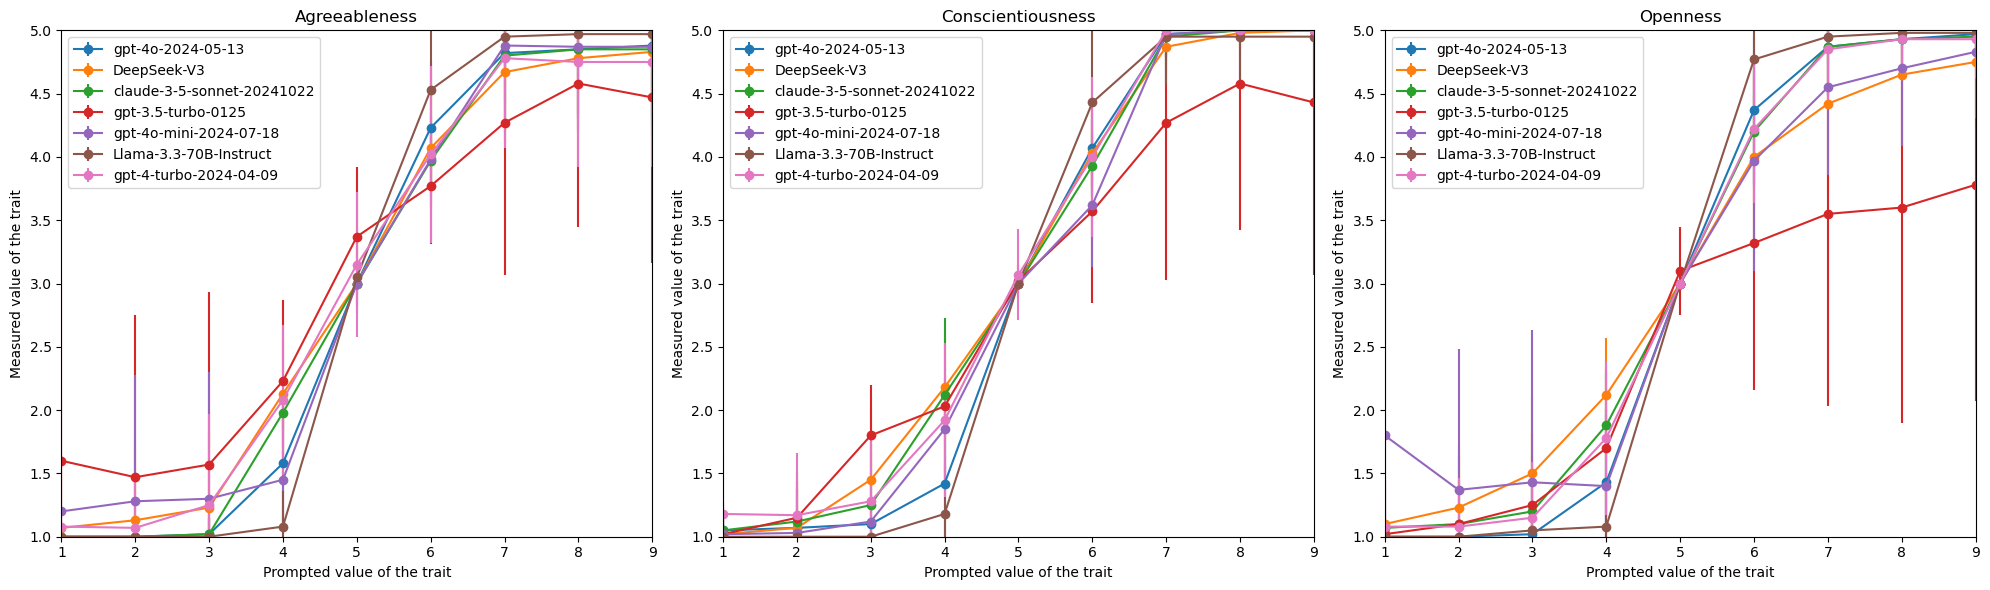

In [19]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Define traits
traits = ['Agreeableness', 'Conscientiousness', 'Openness']

# Plot each trait
for idx, trait in enumerate(traits):
    for model in models:
        x = list(all_res[model][trait].keys())
        y = [float(score.split('+-')[0]) for score in all_res[model][trait].values()]
        yerr = [float(score.split('+-')[1]) for score in all_res[model][trait].values()]
        axs[idx].errorbar(x, y, yerr=yerr, label=model, fmt='-o')
    axs[idx].set_title(trait)
    axs[idx].set_xlabel('Prompted value of the trait')
    axs[idx].set_ylabel('Measured value of the trait')
    axs[idx].set_xlim(1, 9)
    axs[idx].set_ylim(1, 5)
    axs[idx].legend()

plt.tight_layout()
plt.show()

fig.savefig('traits_comparison.png', dpi=300, bbox_inches='tight')

In [11]:
import pandas as pd

model = 'claude-3-5-sonnet-20241022'

# Extract results for Agreeableness and Openness
agreeableness_results = [all_res[model]['Agreeableness'][i] for i in range(1, 10)]
openness_results = [all_res[model]['Openness'][i] for i in range(1, 10)]
conscientiousness_results = [all_res[model]['Conscientiousness'][i] for i in range(1, 10)]

# Create a DataFrame
df_results = pd.DataFrame({
    'Agreeableness': agreeableness_results,
    'Openness': openness_results,
    'Conscientiousness': conscientiousness_results
})

In [12]:
df_results.index = range(1, 10)
df_results

,Agreeableness,Openness,Conscientiousness
1,1.0+-0.0,1.07+-0.31,1.05+-0.22
2,1.0+-0.0,1.1+-0.35,1.12+-0.32
3,1.02+-0.13,1.2+-0.44,1.25+-0.43
4,1.98+-0.13,1.88+-0.41,2.12+-0.61
5,3.0+-0.0,3.0+-0.0,3.0+-0.0
6,3.97+-0.18,4.2+-0.44,3.93+-0.25
7,4.8+-0.6,4.87+-0.39,4.95+-0.22
8,4.85+-0.51,4.93+-0.25,5.0+-0.0
9,4.85+-0.6,4.95+-0.22,5.0+-0.0


In [13]:
df_results.to_markdown()

'|    | Agreeableness   | Openness   | Conscientiousness   |\n|---:|:----------------|:-----------|:--------------------|\n|  1 | 1.0+-0.0        | 1.07+-0.31 | 1.05+-0.22          |\n|  2 | 1.0+-0.0        | 1.1+-0.35  | 1.12+-0.32          |\n|  3 | 1.02+-0.13      | 1.2+-0.44  | 1.25+-0.43          |\n|  4 | 1.98+-0.13      | 1.88+-0.41 | 2.12+-0.61          |\n|  5 | 3.0+-0.0        | 3.0+-0.0   | 3.0+-0.0            |\n|  6 | 3.97+-0.18      | 4.2+-0.44  | 3.93+-0.25          |\n|  7 | 4.8+-0.6        | 4.87+-0.39 | 4.95+-0.22          |\n|  8 | 4.85+-0.51      | 4.93+-0.25 | 5.0+-0.0            |\n|  9 | 4.85+-0.6       | 4.95+-0.22 | 5.0+-0.0            |'

|    | Agreeableness   | Openness   | Conscientiousness   |\n|---:|:----------------|:-----------|:--------------------|\n|  1 | 1.0+-0.0        | 1.07+-0.31 | 1.05+-0.22          |\n|  2 | 1.0+-0.0        | 1.1+-0.35  | 1.12+-0.32          |\n|  3 | 1.02+-0.13      | 1.2+-0.44  | 1.25+-0.43          |\n|  4 | 1.98+-0.13      | 1.88+-0.41 | 2.12+-0.61          |\n|  5 | 3.0+-0.0        | 3.0+-0.0   | 3.0+-0.0            |\n|  6 | 3.97+-0.18      | 4.2+-0.44  | 3.93+-0.25          |\n|  7 | 4.8+-0.6        | 4.87+-0.39 | 4.95+-0.22          |\n|  8 | 4.85+-0.51      | 4.93+-0.25 | 5.0+-0.0            |\n|  9 | 4.85+-0.6       | 4.95+-0.22 | 5.0+-0.0            |
